## Zmienne wybrane do analizy - wraz z opisami

1. Attrition_Flag - Określa, czy klient jest aktywny, czy odszedł od banku : ('Existing Customer' jesli klient jest aktywny, 'Attrited Customer' jesli klient odszedł)
2. Customer_Age - Wiek klienta w latach 
3. Gender - Płeć klienta : ('M' jesli mężczyzna, 'F' jesli kobieta)
4. Dependent_count - Liczba osób na utrzymaniu klienta 
5. Education_Level - Poziom wykształcenia klienta : ('College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown')
6. Marital_Status - Stan cywilny klienta : ('Divorced', 'Married', 'Single', 'Unknown')
7. Income_Category - Przedział dochodowy klienta : (np. '$120K +', '$40K - $60K', '$60K - $80K')
8. Card_Category - Typ karty kredytowej klienta : ('Blue', 'Gold', 'Platinum', 'Silver')
9. Months_on_book - Liczba miesięcy, przez które klient jest związany z bankiem 
10. Total_Relationship_Count - Całkowita liczba produktów bankowych, z których korzysta klient : 
11. Months_Inactive_12_mon - Liczba miesięcy, w których klient był nieaktywny w ciągu ostatnich 12 miesięcy : (numeryczna)
12. Contacts_Count_12_mon - Liczba kontaktów z bankiem w ciągu ostatnich 12 miesięcy 
13. Credit_Limit - Limit kredytowy na karcie klienta 
14. Total_Revolving_Bal - Całkowite saldo odnawialne na karcie kredytowej 
15. Avg_Open_To_Buy - Otwarta linia kredytowa na zakup (średnia z ostatnich 12 miesięcy) 
16. Total_Amt_Chng_Q4_Q1 - Zmiana w wydatkach na karcie między czwartym a pierwszym kwartałem 
17. Total_Trans_Amt - Całkowita kwota transakcji dokonanych przez klienta (ostatnie 12 miesięcy) 
18. Total_Trans_Ct - Całkowita liczba transakcji dokonanych przez klienta (ostatnie 12 miesięcy) 
19. Total_Ct_Chng_Q4_Q1 - Zmiana w liczbie transakcji między czwartym a pierwszym kwartałem 
20. Avg_Utilization_Ratio - Średni współczynnik wykorzystania karty 

## Podział zmiennych na stymulanty, destymulanty i zmienne neutralne:

### Stymulanty: 
1. Customer_Age – starsi klienci mogą być bardziej stabilni finansowo 
2. Dependent_count – może wskazywać na większe zaangażowanie w produkty bankowe 
3. Months_on_book – dłuższa współpraca jest korzystna 
4. Total_Relationship_Count – więcej produktów oznacza większe zaangażowanie klienta 
5. Credit_Limit – większy limit może wskazywać na większe zaufanie banku do klienta 
6. Total_Trans_Amt – większe wydatki są korzystne dla banku 
7. Total_Trans_Ct – większa liczba transakcji oznacza większą aktywność klienta 
8. Total_Amt_Chng_Q4_Q1 – wzrost wydatków jest korzystny 
9. Total_Ct_Chng_Q4_Q1 – wzrost liczby transakcji jest korzystny 

### Dystymulanty: 
1. Months_Inactive_12_mon – mniejsza nieaktywność jest lepsza 
2. Contacts_Count_12_mon – mniej kontaktów może oznaczać mniej problemów 
3. Total_Revolving_Bal – niższe saldo oznacza mniejsze zadłużenie 
4. Avg_Utilization_Ratio – niższe wykorzystanie limitu jest lepsze (mniejsze ryzyko) 

### Zmienne neutralne: 
1. Attrition_Flag – zmienna docelowa w modelowaniu predykcyjnym 
2. Gender – płeć nie ma wpływu na jakość klienta 
3. Education_Level – poziom wykształcenia może być neutralny lub stymulantą 
4. Marital_Status – stan cywilny może być neutralny lub stymulantą 
5. Income_Category – wyższe dochody mogą być zmienną neutralną lub stymulantą (w zależności od strategii banku) 
6. Card_Category – kategoria karty może być zmienną neutralną lub stymulantą (również w zależności od strategii banku) 
7. Avg_Open_To_Buy – zmienna neutralna albo stymulanta w zależności czy bank chce promować większe wykorzystanie limitów kredytowych. 

## Import potrzebnych bibliotek do analizy danych

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Wczytanie ramki danych

In [418]:
df = pd.read_csv("BankChurners.csv")

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami klientów, która nie jest istotna oraz dwie ostatnie według instrukcji załączanej do ramki danych

In [419]:
df = df.drop(["CLIENTNUM",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
             "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" ], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [420]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index)
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) 

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [421]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Obliczenie skośności

In [422]:
df[numerical_features].skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

## Wyświetlenie typów kolumn

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Obsłużenie braków danych
Powyżej widać, że nie mamy braków danych, zatem nie musimy ich obsługiwać.

## Wykresy przed obsłużeniem outliers

### Histogramy

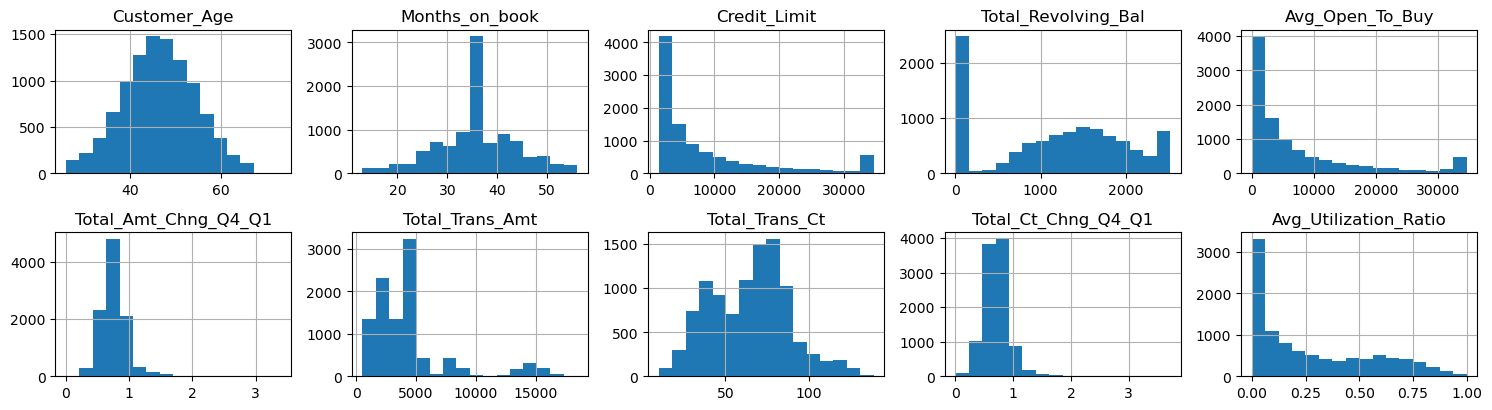

In [424]:
df.drop(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], axis=1).hist(bins=16, figsize=(15, 6), layout=(3, 5))
plt.tight_layout()
plt.show()

### Wykresy słupkowe

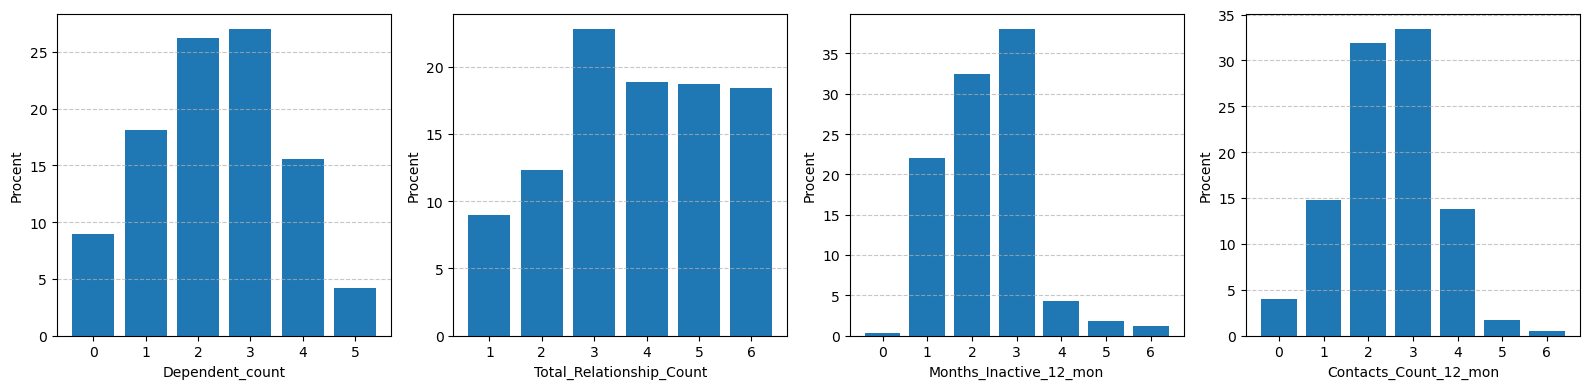

In [425]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, col in enumerate(small_percent):
    percent_distribution = (df[col].value_counts(normalize=True) * 100).sort_index()
    axs[i].bar(percent_distribution.index, percent_distribution.values)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Procent")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Wykresy pudełkowe - przed obsłużeniem outliers

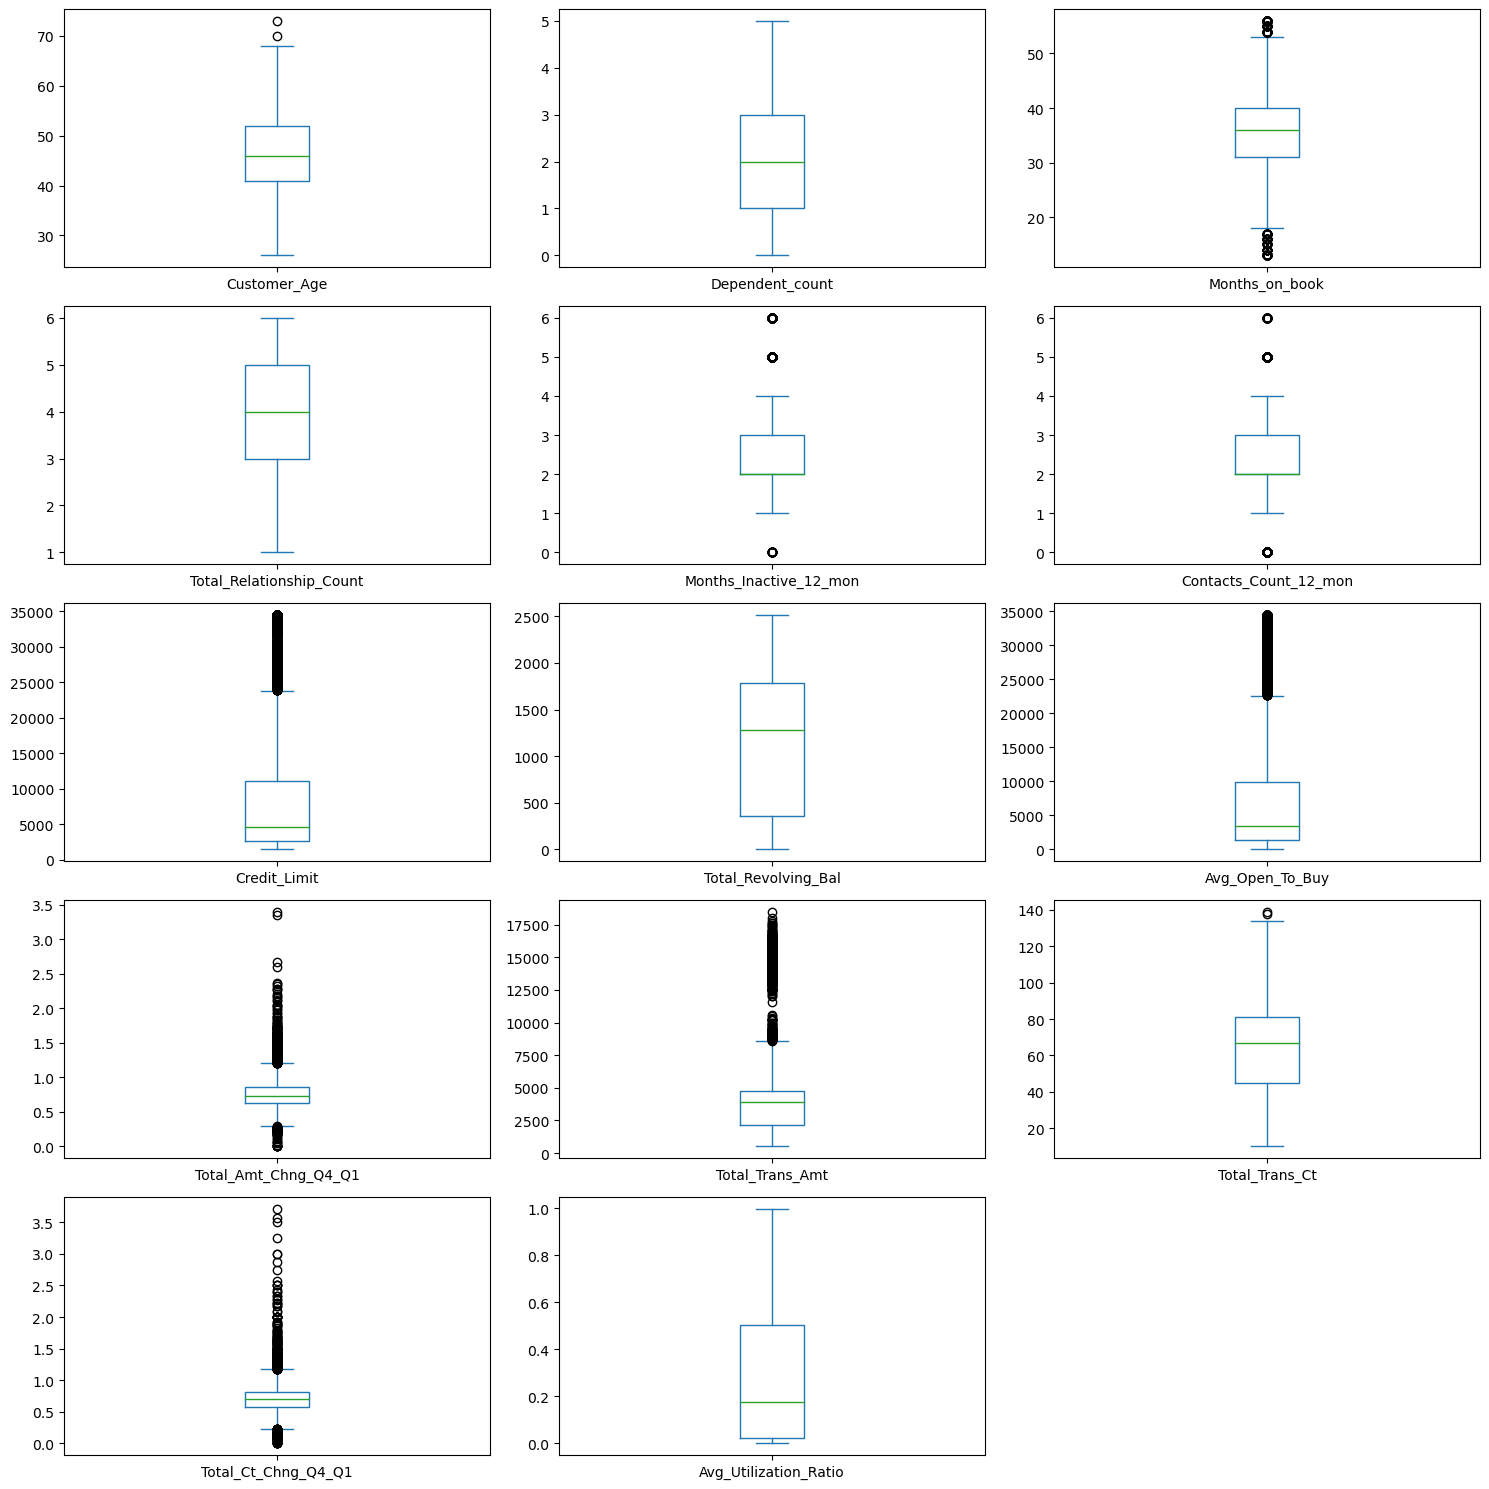

In [426]:
df.plot.box(subplots=True, layout=(5, 3), figsize=(15, 15))
plt.tight_layout()
plt.show()

## Obsługa outliers

### Obliczamy procent outliers dla każdej kolumny

In [427]:
iqr = df[numerical_features].quantile(0.75) - df[numerical_features].quantile(0.25)
was_1 = df[numerical_features].quantile(0.25) - 1.5 * iqr
was_2 = df[numerical_features].quantile(0.75) + 1.5 * iqr

In [428]:
outliers_per_column = ((df[numerical_features] < was_1) | (df[numerical_features] > was_2)).sum()
outliers_percentage = (outliers_per_column / len(df)) * 100
print("\nProcent outlierów w kolumnach:")
print(outliers_percentage)


Procent outlierów w kolumnach:
Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.910339
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.890590
Avg_Utilization_Ratio       0.000000
dtype: float64


Dla outliers w kolumnach w których ich procent jest mniejszy niż 5 usuwamy je, z kolei tam gdzie ich procent jest większy równy niż 5 zastępujemy ich wartości wąsami.

In [429]:
low_cols = outliers_percentage[outliers_percentage < 5].index.tolist() 
high_cols = outliers_percentage[outliers_percentage >= 5].index.tolist()

In [430]:
df = df[~((df[low_cols] < was_1[low_cols]) | (df[low_cols] > was_2[low_cols])).any(axis = 1)]

In [431]:
df.loc[:, high_cols] = df[high_cols].clip(
        lower=was_1[high_cols],
        upper=was_2[high_cols],
        axis=1
    )

C:\Users\micha\AppData\Local\Temp\ipykernel_26116\1237488139.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 2. 2. ... 4. 3. 4.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, high_cols] = df[high_cols].clip(
C:\Users\micha\AppData\Local\Temp\ipykernel_26116\1237488139.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1201.   1570.   1207.   ... 8619.25 8395.   8619.25]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, high_cols] = df[high_cols].clip(


## Po obsłużeniu outliers

### Wykresy pudełkowe

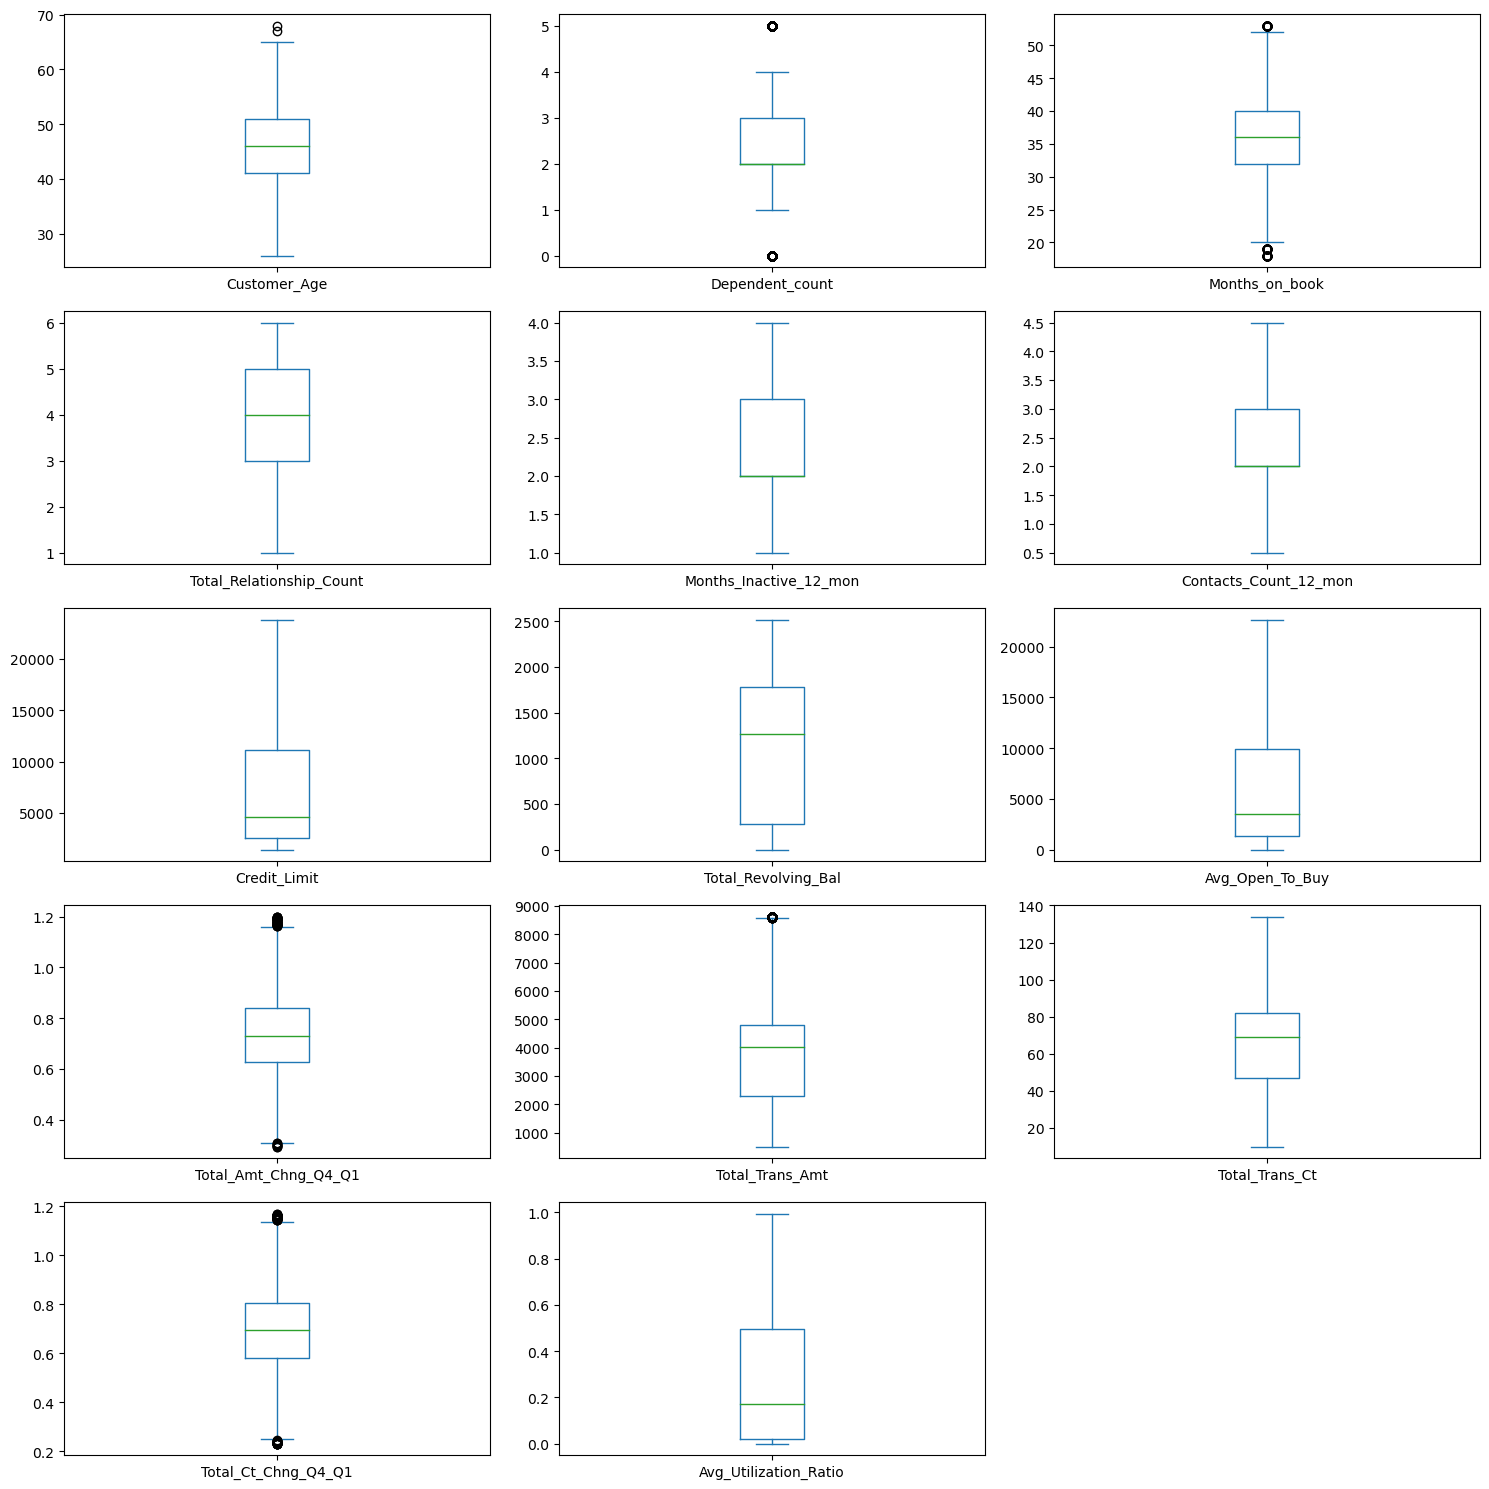

In [432]:
df.plot.box(subplots=True, layout=(5, 3), figsize=(15, 15))
plt.tight_layout()
plt.show()

### Histogramy

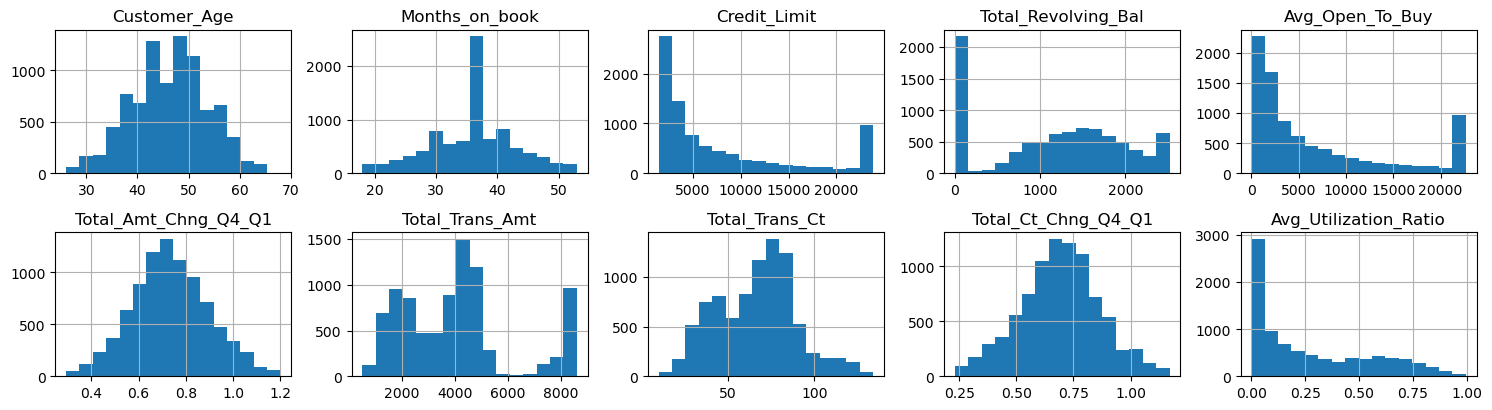

In [433]:
df.drop(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], axis=1).hist(bins=16, figsize=(15, 6), layout=(3, 5))
plt.tight_layout()
plt.show()

### Wykresy słupkowe

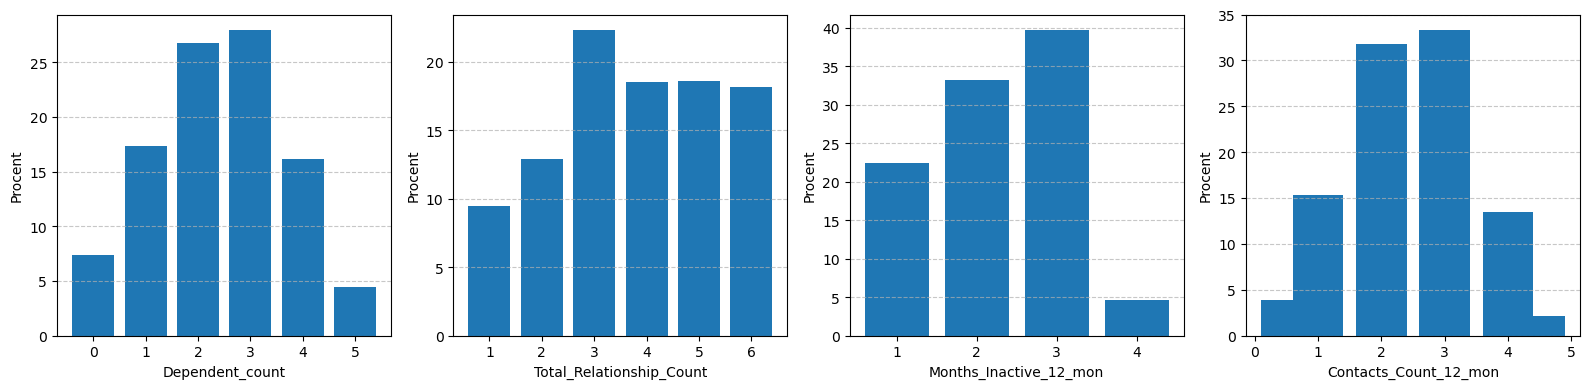

In [434]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, col in enumerate(small_percent):
    percent_distribution = (df[col].value_counts(normalize=True) * 100).sort_index()
    axs[i].bar(percent_distribution.index, percent_distribution.values)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Procent")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

## Obliczenie korelacji

In [435]:
df[numerical_features].corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.116512,0.746226,-0.009817,0.040425,-0.010358,0.001680,0.020414,-0.000647,-0.078913,-0.034566,-0.060922,-0.045330,0.018804
Dependent_count,-0.116512,1.000000,-0.103328,-0.035611,-0.018234,-0.029568,0.060118,-0.000713,0.060336,-0.023812,0.034102,0.031549,0.001550,-0.032719
Months_on_book,0.746226,-0.103328,1.000000,-0.009697,0.054766,-0.002067,0.006452,0.012822,0.004718,-0.054043,-0.023737,-0.039594,-0.035614,0.004314
Total_Relationship_Count,-0.009817,-0.035611,-0.009697,1.000000,0.000221,0.074364,-0.061464,0.001799,-0.062175,0.008415,-0.366008,-0.249780,0.006603,0.058121
Months_Inactive_12_mon,0.040425,-0.018234,0.054766,0.000221,1.000000,0.041486,-0.020587,-0.052920,-0.015413,-0.010094,-0.058666,-0.083355,-0.048004,-0.019011
Contacts_Count_12_mon,-0.010358,-0.029568,-0.002067,0.074364,0.041486,1.000000,0.016318,-0.053271,0.021637,-0.024042,-0.157194,-0.167681,-0.102249,-0.052915
Credit_Limit,0.001680,0.060118,0.006452,-0.061464,-0.020587,0.016318,1.000000,0.053896,0.994376,0.009957,0.147594,0.071717,-0.017888,-0.515554
Total_Revolving_Bal,0.020414,-0.000713,0.012822,0.001799,-0.052920,-0.053271,0.053896,1.000000,-0.046915,0.019757,0.067674,0.074571,0.076437,0.621056
Avg_Open_To_Buy,-0.000647,0.060336,0.004718,-0.062175,-0.015413,0.021637,0.994376,-0.046915,1.000000,0.007757,0.142089,0.065296,-0.025783,-0.584075
Total_Amt_Chng_Q4_Q1,-0.078913,-0.023812,-0.054043,0.008415,-0.010094,-0.024042,0.009957,0.019757,0.007757,1.000000,0.178025,0.141140,0.268157,0.013656


## Generacja heat mapy korelacji

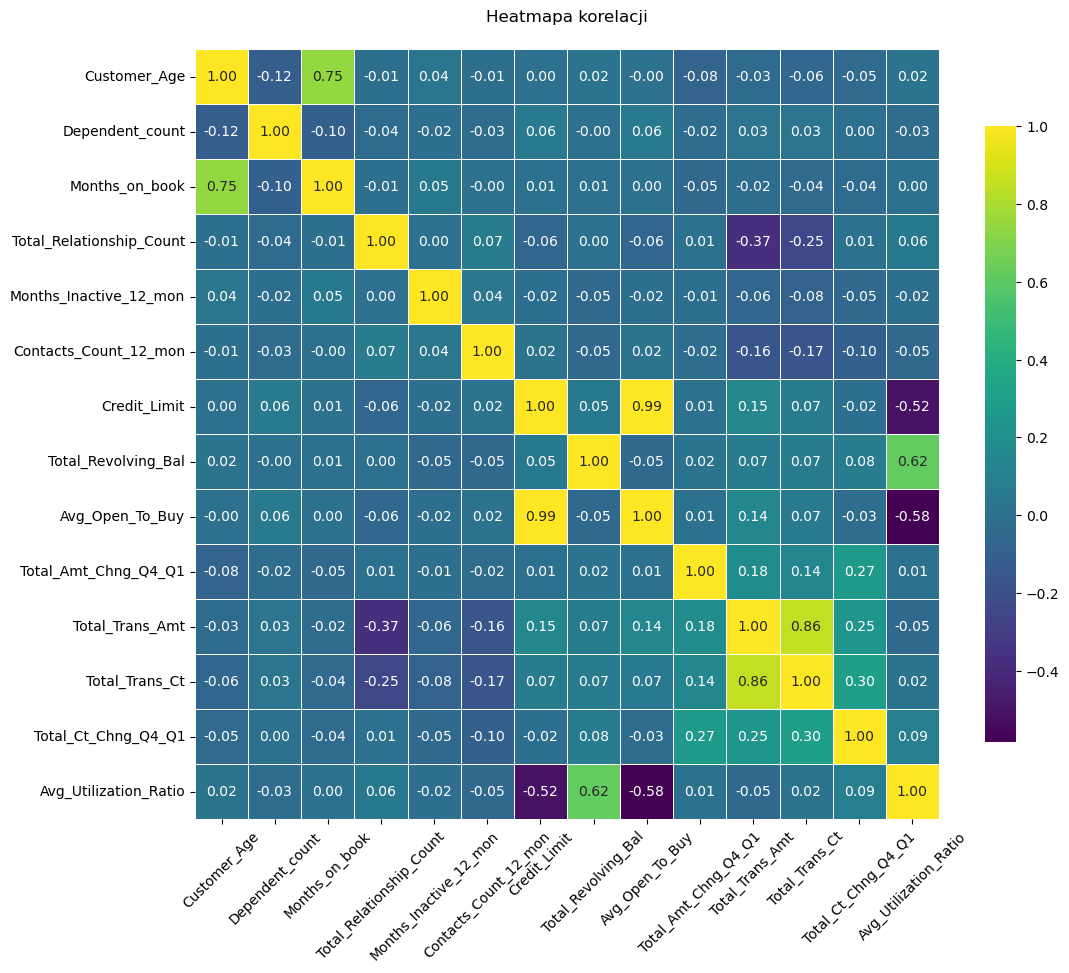

In [436]:
corr = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()